In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [17]:
def qft_circuit(circuit,n):
    if n==0:
        return circuit
    n-=1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit),qubit,n)
    qft_circuit(circuit,n)
        
def swap_qubit(circuit,n):
    for qubit in range(n//2):
        circuit.swap(qubit,n-1-qubit)
    return circuit

def qft(circuit,n):
    qft_circuit(circuit,n)
    swap_qubit(circuit,n)
    return circuit
    
def inverse_qft(circuit,n):
    circ_qft=qft(QuantumCircuit(n),n)
    inv_qft_circuit=circ_qft.inverse()
    qft_gate=inv_qft_circuit.to_gate()
    qft_gate.name='QFT+'
    circuit.append(qft_gate, range(n))
    
    return circuit
    

nqubits=3
number=5
qc=QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*np.pi/4,0)
qc.p(number*np.pi/2,1)
qc.p(number*np.pi,2)

inverse_qft(qc,nqubits)
qc.measure_all()

qc.draw()

┌───┐┌─────────┐┌───────┐ ░ ┌─┐      
   q_0: ┤ H ├┤ P(5π/4) ├┤0      ├─░─┤M├──────
        ├───┤├─────────┤│       │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ P(5π/2) ├┤1 QFT+ ├─░──╫─┤M├───
        ├───┤└┬───────┬┘│       │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─┤ P(5π) ├─┤2      ├─░──╫──╫─┤M├
        └───┘ └───────┘ └───────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════╩══╩══╩═
                                     0  1  2

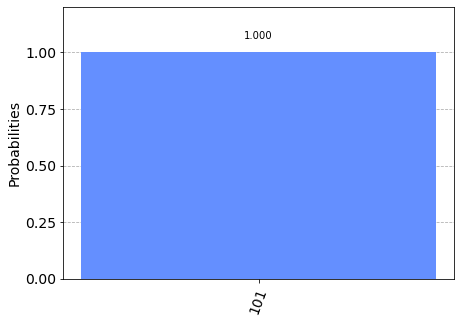

In [18]:
simulator=Aer.get_backend('qasm_simulator')
job_c=execute(qc,backend=simulator)
counts=job_c.result().get_counts()
plot_histogram(counts)

In [19]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_lima')
job_q = execute(qc, backend=qcomp)

/Users/marwa/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [20]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


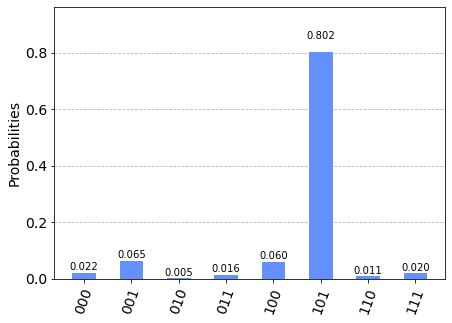

In [22]:
result_q=job_q.result()
plot_histogram(result_q.get_counts(qc))